In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import pearsonr
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, confusion_matrix

In [2]:
# Assume 'data' is your full DataFrame
df = pd.read_csv("dataset_train_target_191_v5.csv")

In [3]:
df

,smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,TYRO3,ULK1,ULK3,VGFR1,VGFR2,VGFR3,WEE1,YES,ZAP70,Activity
0,CC(=O)Nc1nccc(c2ccc(OCC(N)CC(C)C)c(C)c2)c1,11.175565,11.175565,0.041192,-0.136745,0.803514,12.080000,341.455,314.239,341.210327,...,0,0,0,0,0,0,0,0,0,1
1,CC(C)CC(C)(N)COc1ccc(c2ccnc3ccccc23)cc1C1CC1,6.458574,6.458574,0.310555,-0.310555,0.558106,16.321429,374.528,344.288,374.235814,...,0,0,0,0,0,0,0,0,0,1
2,CC(C)CC(C)(N)COc1ccc(c2nc(C(C)C)ncc2)cc1F,14.423366,14.423366,0.210482,-0.487997,0.799608,13.960000,345.462,317.238,345.221641,...,0,0,0,0,0,0,0,0,0,1
3,CC(C)CC(C)(N)COc1ncc(c2ccnc3ccccc23)cc1C(F)F,13.703593,13.703593,0.071720,-2.703999,0.593337,13.857143,385.458,360.258,385.196569,...,0,0,0,0,0,0,0,0,0,1
4,Cc1cc(c2ccc(OCC(C)(N)CC(C)C)c(S(=O)(=O)C)c2)ccn1,12.282857,12.282857,0.171122,-3.446282,0.798179,14.269231,376.522,348.298,376.182064,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425945,Clc1ccc(Nc2nnc(Cc3ccncc3)c3c2cccc3)cc1,5.947311,5.947311,0.702955,0.702955,0.563825,10.760000,346.821,331.701,346.098524,...,0,0,0,0,0,0,0,0,1,0
425946,COC1C(N(C)C(=O)c2ccccc2)CC2OC1(C)n1c3c(cccc3)c...,13.882905,13.882905,0.044612,-0.979914,0.287218,24.162791,570.649,540.409,570.226705,...,0,0,0,0,0,0,0,0,1,0
425947,C#Cc1cc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)ccc1,5.857397,5.857397,0.392174,0.392174,0.417884,10.517241,393.443,370.259,393.168856,...,0,0,0,0,0,0,0,0,1,0
425948,CC12OC(CC1(O)CO)n1c3ccccc3c3c4C(=O)NCc4c4c5c(c...,13.163771,13.163771,0.055524,-1.477323,0.373216,27.848485,439.471,418.303,439.153206,...,0,0,0,0,0,0,0,0,1,1


In [4]:
list(df.columns.values)

['smiles',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 '

In [5]:
# Split the dataset into features (X) and labels (y)
X = df.iloc[:, 1:-1] #rdkit descriptors aka features and protein one hot encode and activity
y = df["Activity"]

In [6]:
list(X.columns.values)

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'SPS',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',


In [7]:
#Check for NaN, Inf, and large values
print("NaN values:", np.isnan(X).sum().sum())
print("Infinite values:", np.isinf(X).sum().sum())
print("Large values:", np.any(np.abs(X) > 1e10))

NaN values: 1320
Infinite values: 90
Large values: True


In [8]:
#Handle NaN and Inf values if found
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # Replace NaNs with column means

In [9]:
#Check for NaN, Inf, and large values
print("NaN values:", np.isnan(X).sum().sum())
print("Infinite values:", np.isinf(X).sum().sum())
print("Large values:", np.any(np.abs(X) > 1e10))

NaN values: 0
Infinite values: 0
Large values: True


In [10]:
#Check for NaN, Inf, and large values
print("NaN values:", np.isnan(y).sum().sum())
print("Infinite values:", np.isinf(y).sum().sum())
print("Large values:", np.any(np.abs(y) > 1e10))

NaN values: 0
Infinite values: 0
Large values: False


In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
print("Large values X_train_scaled:", np.any(np.abs(X_train_scaled) > 1e10))
print("Large values X_test_scaled:", np.any(np.abs(X_test_scaled) > 1e10))

Large values X_train_scaled: False
Large values X_test_scaled: False


In [14]:
X.count()

MaxAbsEStateIndex    425950
MaxEStateIndex       425950
MinAbsEStateIndex    425950
MinEStateIndex       425950
qed                  425950
                      ...  
VGFR2                425950
VGFR3                425950
WEE1                 425950
YES                  425950
ZAP70                425950
Length: 401, dtype: int64

In [15]:
# Input layer
input_layer = Input(shape=(401,))

In [16]:
# Shared layers
shared_layer = Dense(128, activation='relu')(input_layer)
shared_layer = Dense(64, activation='relu')(shared_layer)

In [17]:
# Activity prediction output
y_pred = Dense(1, activation='sigmoid', name='y_pred')(shared_layer)

In [18]:
# Define model
model = Model(inputs=input_layer, outputs=y_pred)

In [19]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss={'y_pred': 'binary_crossentropy'},
              metrics=['accuracy', 'mse'])

In [20]:
# Train the model
history = model.fit(X_train_scaled, 
                    {'y_pred': y_train},
                    validation_data=(X_test_scaled, {'y_pred': y_test}),
                    epochs=25, batch_size=32)


Epoch 1/25
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.7094 - loss: 0.5607 - mse: 0.1899 - val_accuracy: 0.7817 - val_loss: 0.4631 - val_mse: 0.1508
Epoch 2/25
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7942 - loss: 0.4419 - mse: 0.1428 - val_accuracy: 0.8051 - val_loss: 0.4246 - val_mse: 0.1364
Epoch 3/25
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8199 - loss: 0.3988 - mse: 0.1269 - val_accuracy: 0.8186 - val_loss: 0.4025 - val_mse: 0.1280
Epoch 4/25
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8338 - loss: 0.3741 - mse: 0.1181 - val_accuracy: 0.8242 - val_loss: 0.3910 - val_mse: 0.1238
Epoch 5/25
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8424 - loss: 0.3576 - mse: 0.1124 - val_accuracy: 0.8321 - val_loss: 0.3796 - val_mse: 0.1196
Epoch 6/25
10649/10649 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.8522 - loss: 0.3405 - mse: 0.1062 - val_accuracy: 0.8361 - val_loss: 0.3733 - val_mse: 0.1170
Epoch 7/25

In [21]:
# Evaluate the model on the test data
results = model.evaluate(X_test_scaled, 
                         {'y_pred': y_test})

# Unpack the results
activity_loss = results[0]
activity_accuracy = results[1]

print(f"Activity Loss: {activity_loss}, Activity Accuracy: {activity_accuracy}")


2663/2663 ━━━━━━━━━━━━━━━━━━━━ 3s 975us/step - accuracy: 0.8573 - loss: 0.3489 - mse: 0.1041
Activity Loss: 0.3411763608455658, Activity Accuracy: 0.860218346118927


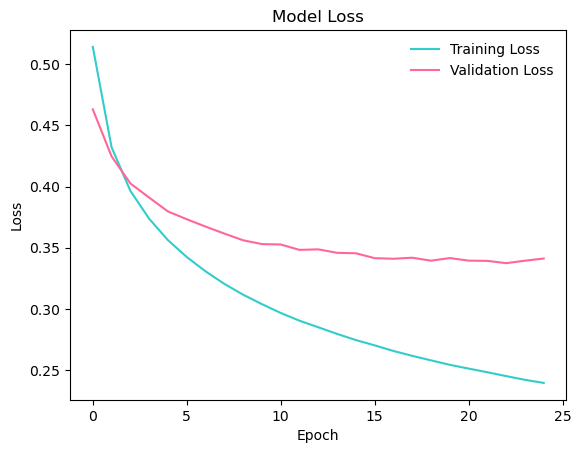

In [56]:
# Plot training & validation loss for both outputs
plt.figure(facecolor='none', edgecolor='none')
plt.plot(history.history['loss'], label='Training Loss', color='#33CCCC')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#FF6699')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right', frameon=False)
plt.gca().set_facecolor('none')
plt.show()


In [23]:
list(history.history)

['accuracy', 'loss', 'mse', 'val_accuracy', 'val_loss', 'val_mse']

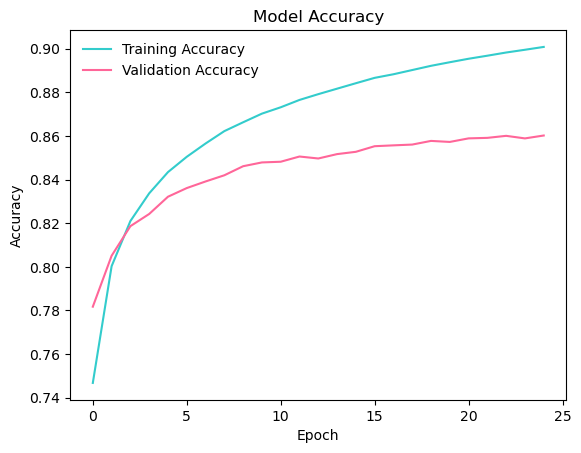

In [60]:
# Plot accuracy for activity prediction
plt.figure(facecolor='none', edgecolor='none')
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#33CCCC')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#FF6699')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left', frameon=False)
plt.gca().set_facecolor('none')
plt.show()

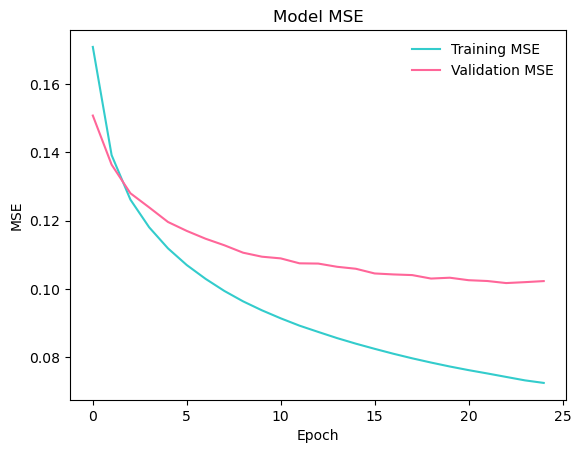

In [59]:
# Plot accuracy for Model MSE
plt.figure(facecolor='none', edgecolor='none')
plt.plot(history.history['mse'], label='Training MSE', color='#33CCCC')
plt.plot(history.history['val_mse'], label='Validation MSE', color='#FF6699')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right', frameon=False)
plt.gca().set_facecolor('none')
plt.show()

In [25]:
# Get weights from the first dense layer
layer_weights = model.layers[1].get_weights()[0]  # First hidden layer weights
feature_importance = np.mean(np.abs(layer_weights), axis=1)  # Mean absolute weight per feature

# Sort and display top features
sorted_indices = feature_importance.argsort()[::-1]
for i in sorted_indices[:20]:  # Top 10 features
    print(f"{X.columns[i]}: {feature_importance[i]}")

EGFR: 0.13225339353084564
fr_imidazole: 0.12262660264968872
fr_pyridine: 0.11803394556045532
MTOR: 0.11478301882743835
MK14: 0.10851044952869415
CHK1: 0.10702580958604813
SMR_VSA9: 0.10545617341995239
BRAF: 0.10412075370550156
fr_para_hydroxylation: 0.10408331453800201
PEOE_VSA12: 0.10319435596466064
fr_urea: 0.10251763463020325
CDK2: 0.10212388634681702
CDK4: 0.10206317901611328
PEOE_VSA4: 0.10112489759922028
SlogP_VSA8: 0.10072764754295349
GSK3B: 0.10052178055047989
PEOE_VSA3: 0.09974218904972076
fr_imide: 0.09958618879318237
EState_VSA2: 0.09920963644981384
fr_aryl_methyl: 0.0991414338350296


In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 401)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ y_pred (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,333 (700.52 KB)

 Trainable params: 59,777 (233.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 119,556 (467.02 KB)

In [63]:
#for f1 score, confusion matrix and roc auc
y_prob = model.predict(X_test_scaled)

2663/2663 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step


In [64]:
# Step 2: Convert probabilities to binary predictions (using a threshold of 0.5)
y_pred_2 = (y_prob > 0.5).astype(int)

In [65]:
# Step 3: Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

In [67]:
# Step 4: Calculate the F1 score
f1 = f1_score(y_test, y_pred_2)

In [68]:
# Step 5: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

In [69]:
print(f'AUC: {auc:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(cm)

AUC: 0.9346
F1 Score: 0.8630
Confusion Matrix:
[[35790  6653]
 [ 5255 37492]]


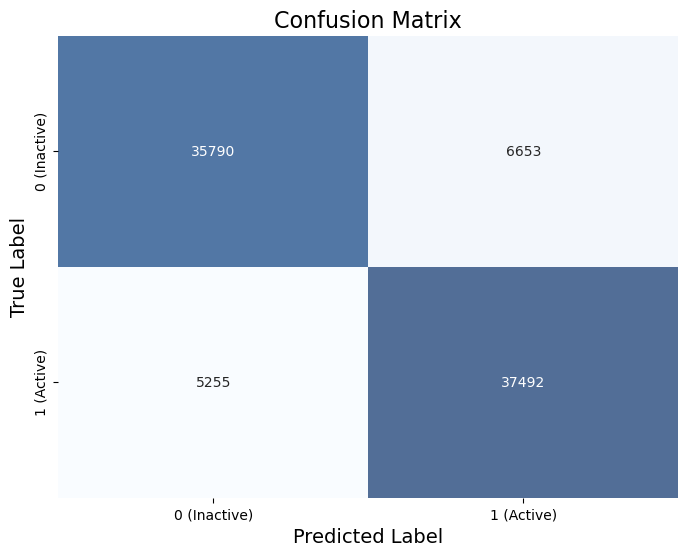

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0 (Inactive)', '1 (Active)'], 
            yticklabels=['0 (Inactive)', '1 (Active)'],
            linewidths=0.5, linecolor='black',  # Add borders around cells
            alpha=0.7)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

In [76]:
# Step 1: Calculate the False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [77]:
# Step 2: Calculate the AUC
roc_auc = auc(fpr, tpr)

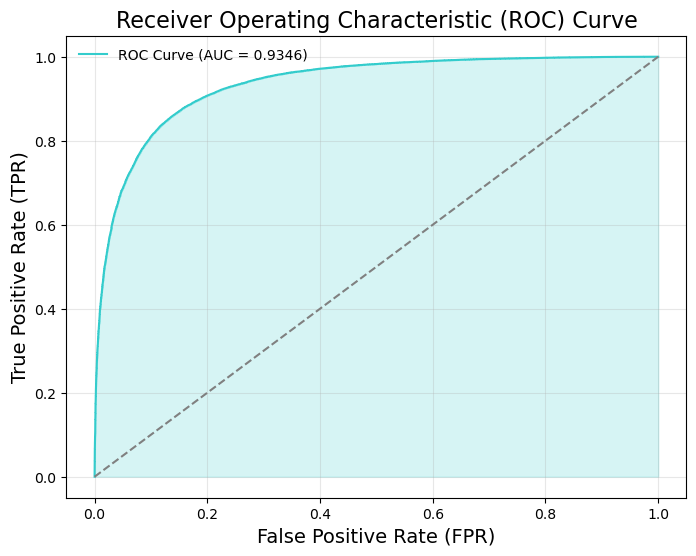

In [87]:
# Step 3: Plot the ROC Curve
plt.figure(figsize=(8, 6), facecolor='none', edgecolor='none')
plt.plot(fpr, tpr, color='#33CCCC', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.fill_between(fpr, tpr, alpha=0.2, color='#33CCCC')  # Optional: fill the area under the curve

# Step 4: Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='upper left', frameon=False)
plt.grid(alpha=0.3)
plt.gca().set_facecolor('none')
plt.show()

In [86]:
# Example: Calculate Pearson correlation between predicted probabilities and true labels
corr, p_value = pearsonr(y_test, y_prob.flatten())  # Flatten y_prob to ensure 1D shape

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4e}")

Pearson correlation coefficient: 0.7713
P-value: 0.0000e+00
